# Gold Prediction using XGBoost, Decision tree & RF

# Data Preprocessing

In [2]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [14]:
pip install --upgrade matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl (7.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip show matplotlib

Name: matplotlib
Version: 3.8.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: C:\Users\kadam\anaconda3\Lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip uninstall matplotlib==<version_to_uninstall>

Note: you may need to restart the kernel to use updated packages.


The syntax of the command is incorrect.


In [18]:
pip uninstall matplotlib
pip install matplotlib

SyntaxError: invalid syntax (3290033791.py, line 1)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [156]:
ps = pd.read_csv(r"C:\Users\kadam\Downloads\gld_price_data.csv")

In [21]:
ps

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [22]:
ps.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [23]:
# Deleting the Date column 
ps = ps.drop(columns =['Date'],axis=1)
ps.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


# Dataframe Shape & Data Type

In [24]:
ps.shape

(2290, 5)

In [157]:
ps.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

# Handling Duplicates

In [158]:
duplicate = ps.duplicated()  
sum(duplicate)

0

In [164]:
# Remove duplicates
ps = ps.drop_duplicates() 
duplicate = ps.duplicated()
sum(duplicate) 

0

In [165]:
# checking the no. of missing values in each column
ps.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [166]:
# Seeing the datatype of each columns
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


# Describe Data

In [168]:
# Seeing the mathematical values 
ps.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Skewness

In [170]:
ps = ps.drop(columns =['Date'],axis=1)
ps.skew()

SPX        0.300362
GLD        0.334138
USO        1.699331
SLV        1.153641
EUR/USD   -0.005292
dtype: float64

# Measure of Dispersion

In [172]:
ps.var()

SPX        269476.791172
GLD           542.114189
USO           381.167717
SLV            50.304498
EUR/USD         0.017305
dtype: float64

# Kurtosis

In [173]:
ps.kurt()

SPX       -0.950622
GLD       -0.275081
USO        4.229726
SLV        0.470147
EUR/USD   -0.742751
dtype: float64

# Exploratory Data Analysis

array([[<Axes: title={'center': 'SPX'}>, <Axes: title={'center': 'GLD'}>,
        <Axes: title={'center': 'USO'}>, <Axes: title={'center': 'SLV'}>,
        <Axes: title={'center': 'EUR/USD'}>]], dtype=object)

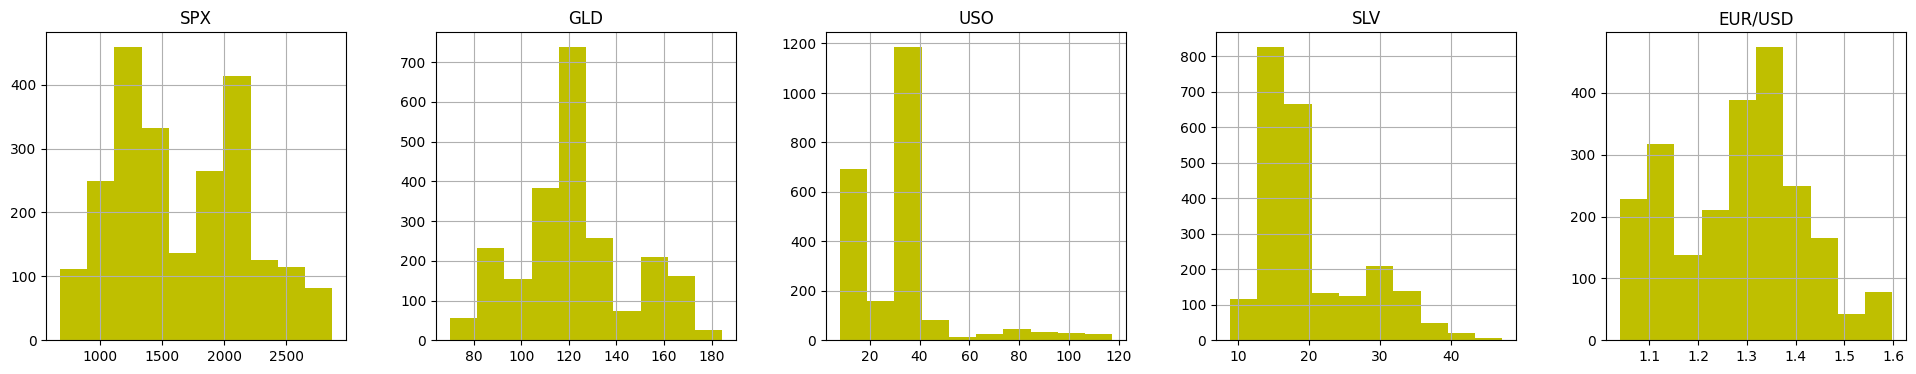

In [84]:
ps.hist(figsize=(24,4) , layout=(1,5) , color='y')

In [176]:
ps.GLD.max()

184.589996

In [177]:
ps['SPX'].value_counts()

SPX
1447.160034    2
2268.899902    2
2066.659912    2
2095.840088    2
2373.469971    2
              ..
1278.359985    1
1267.640015    1
1265.420044    1
1287.869995    1
2725.780029    1
Name: count, Length: 2277, dtype: int64

# Checking the outliers of the data


<Axes: >

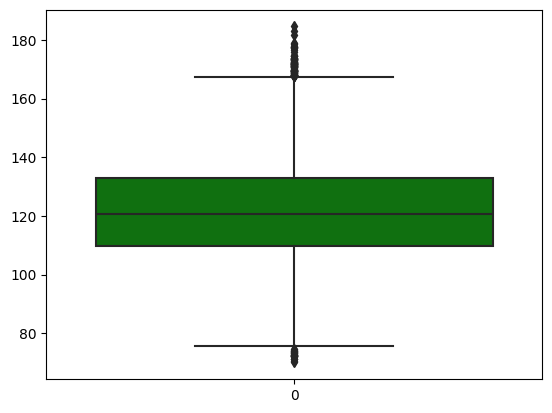

In [94]:
sns.boxplot(ps['GLD'],color='g')

<Axes: >

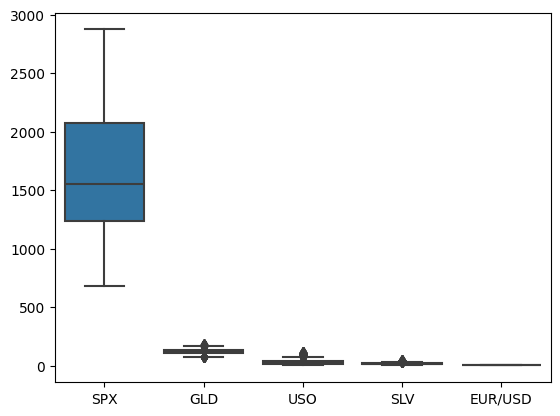

In [29]:
sns.boxplot(ps)

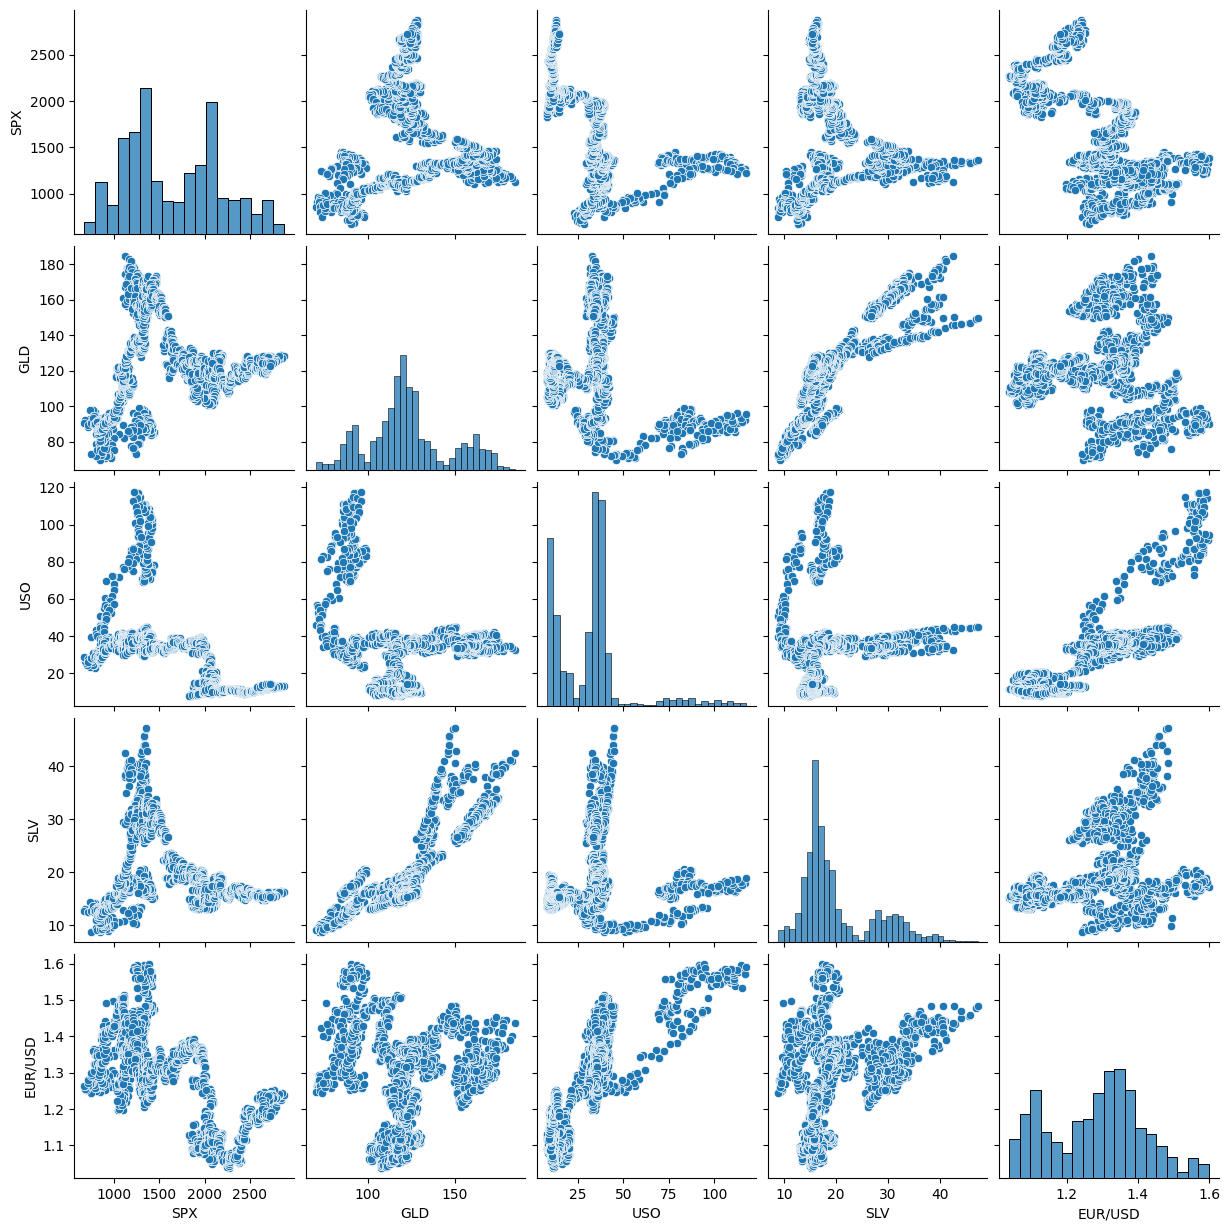

In [113]:
sns.pairplot(ps)


In [114]:
# correlation 
correlation = ps.corr()

<Axes: >

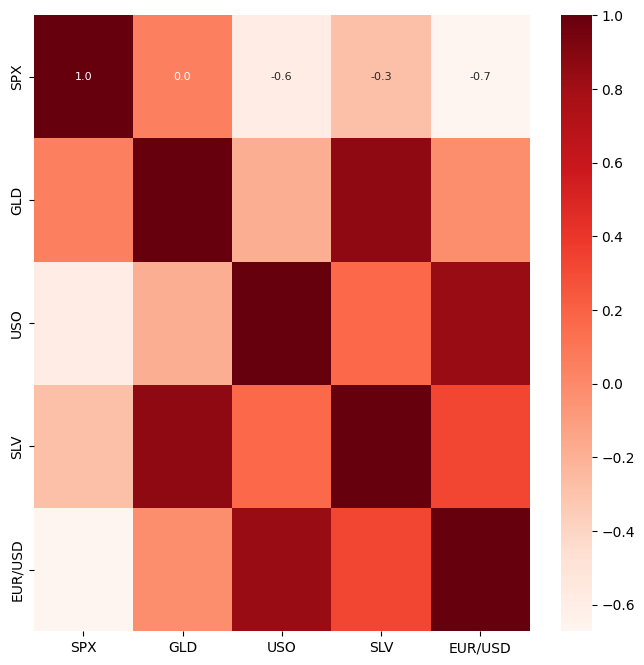

In [115]:
# Plotting a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation , cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

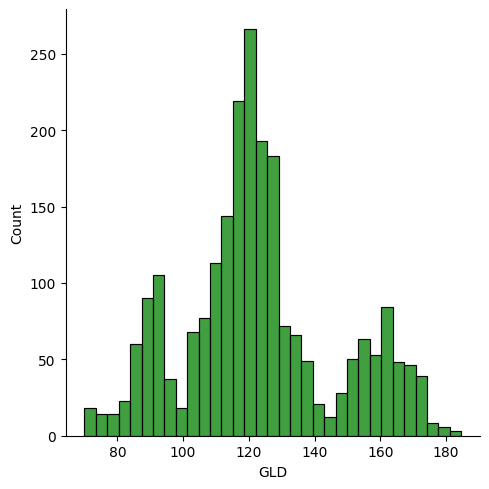

In [116]:
#checking the distribution of gold value
sns.displot(ps['GLD'],color='green')

In [117]:
X = ps.drop(columns=['GLD'],axis=1)
y = ps['GLD']

In [190]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [191]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [147]:
from sklearn.linear_model import LinearRegression

In [153]:
ps_num = ps.select_dtypes(['int', 'float'])
ps_cat = ps.select_dtypes('O') # "O" - >object datatype

for col in ps_cat:
    le = LabelEncoder()
    ps_cat[col] = le.fit_transform(ps_cat[col])

In [154]:
ps_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [155]:
ps_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Empty DataFrame


In [148]:
x = ps.drop('GLD', axis = 1) # features
y = ps['GLD']

In [149]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2,random_state =2023)

In [150]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1832, 4), (458, 4), (1832,), (458,))

In [151]:
# Baseline model
lr = LinearRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

In [152]:
ps.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


# Train test split 

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

# Feature Scaling

In [121]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train,y_train)
X_test_scaled  =scaler.transform(X_test)

# Model Training

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor

In [123]:
# Random forest
rf = RandomForestRegressor()
rf.fit(X_train_scaled,y_train)
y_rf = rf.predict(X_test_scaled)

In [124]:
# Decision tree
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled,y_train)
y_dt = dt.predict(X_test_scaled)

In [125]:
# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train_scaled,y_train)
y_xgb = xgb.predict(X_test_scaled)

# Regression score using R2score and MAE

In [126]:
from sklearn import metrics

In [127]:
rf_score = metrics.r2_score(y_test,y_rf)
print("Random forest : ", rf_score)

Random forest :  0.9902462381054733


In [128]:
dt_score = metrics.r2_score(y_test,y_dt)
print("Decision tree : ",dt_score)

Decision tree :  0.985349153957093


In [129]:
xgb_score = metrics.r2_score(y_test,y_xgb)
print("XGBoost : ",xgb_score)

XGBoost :  0.9885715958139172


# checking the mean absolute error

In [130]:
from sklearn.metrics import mean_absolute_error
print("MAE for Random Forest")
mean_absolute_error(y_test,y_rf)

MAE for Random Forest


1.2352728942576454

In [131]:
print("MAE for Decision Tree")
mean_absolute_error(y_test,y_xgb)

MAE for Decision Tree


1.371212750236678

In [132]:
print("MAE for XGBoost")
mean_absolute_error(y_test,y_rf)

MAE for XGBoost


1.2352728942576454

# Hyperparameter Tuning using GridSearchCV 

In [133]:
rf1 = RandomForestRegressor()
#Number of trees in random forest
n_estimators = [20,60,100,120]

#No. of features to consider at every split
max_features = [0.2,0.6,1.0]

#Maximum number of levels in tree
max_depth = [2,8,None]

#No. of samples
max_samples = [0.5,0.75,1.0]

In [134]:
param_grid = { 'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'max_samples' : max_samples
}

In [135]:
from sklearn.model_selection import GridSearchCV

rf1_grid = GridSearchCV(estimator = rf1,
                       param_grid = param_grid,
                       cv=5,
                       verbose =2,
                       n_jobs = -1)

In [136]:
rf1_grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [137]:
rf1_grid.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 1.0,
 'n_estimators': 120}

In [138]:
rf1_grid.best_score_

0.9890809841378511

# Compare the Actual values and Predicted Values in a plot

In [265]:
y_test = list(y_test) 

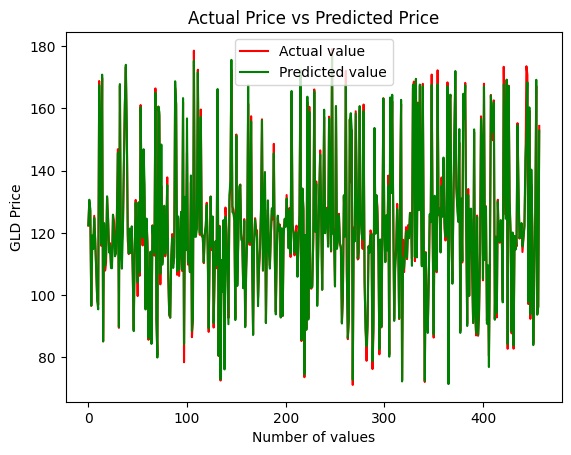

In [266]:
plt.plot(y_test , color='Red' , label='Actual value')
plt.plot(y_rf , color='green' , label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()